In [1]:
from urllib.request import urlopen
from urllib.error import HTTPError, URLError

from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

import requests
import time
import numpy as np


In [2]:
def getSiteHTML(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return
    except URLError as e:
        print('The server could not be found(((')
    else:
        return html

In [3]:
wildberries_urls = {'base': 'https://www.wildberries.ru',
                    'food': 'https://www.wildberries.ru/catalog/pitanie'}
wildberries_house_url = 'https://www.wildberries.ru/catalog/18993938/detail.aspx?targetUrl=GP'

wildberries_food_url = wildberries_urls['food']
html = getSiteHTML(wildberries_food_url)

In [4]:
bs = BeautifulSoup(html, 'html.parser')

In [5]:
bs.prettify()

'<!DOCTYPE html>\n<html class="adaptive" lang="ru" translate="no">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=7; IE=Edge" http-equiv="X-UA-Compatible"/>\n  <base href="https://www.wildberries.ru/"/>\n  <link href="wildberries://www.wildberries.ru/catalog/pitanie" rel="alternate"/>\n  <meta content="telephone=no" name="format-detection"/>\n  <meta content="no-referrer-when-downgrade" name="referrer"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Wildberries" name="application-name">\n   <meta content="61b95d33285e2612" name="yandex-verification">\n    <meta content="guMau7oNvBifqUhZGuuGVtiGD0HkKe8v6uwYpvj2ZIg" name="google-site-verification">\n     <meta content="e08a4d66746555c8641fe953d12262c8" name="wmail-verification">\n      <link href="/manifestv2.txt" rel="manifest"/>\n      <link href="/opensearch.xml" rel="search" title="test" type="application/opensearchdescription+xml">\n       <link href="/favicon.ico" rel="icon" ty

In [6]:
catalog = bs.find('ul', {'class': 'menu-catalog__list-2'})

In [7]:
catalog.find_all('a')

[<a href="/catalog/produkty/vkusnye-podarki">Вкусные подарки</a>,
 <a href="/catalog/produkty-pitaniya/chay-kofe">Чай и кофе</a>,
 <a href="/catalog/pitanie/sladosti">Сладости и хлебобулочные изделия</a>,
 <a href="/catalog/pitanie/bakaleya">Бакалея</a>,
 <a href="/catalog/pitanie/detskoe-pitanie">Детское питание</a>,
 <a href="/catalog/produkty/dobavki-pishchevye">Добавки пищевые</a>,
 <a href="/catalog/pitanie/zdorovoe-pitanie">Здоровое питание</a>,
 <a href="/catalog/produkty/myasnaya-produktsiya">Мясная продукция</a>,
 <a href="/catalog/pitanie/chay-kofe/moloko-i-slivki">Молочные продукты и яйца</a>,
 <a href="/catalog/pitanie/napitki">Напитки</a>,
 <a href="/catalog/pitanie/sneki">Снеки</a>,
 <a href="/catalog/produkty/zamorozhennaya-produktsiya">Замороженная продукция</a>,
 <a href="/catalog/produkty/frukty">Фрукты и ягоды</a>,
 <a href="/catalog/produkty/ovoshchi">Овощи</a>]

In [8]:
category_urls = []
for link in catalog.find_all('a'):
    if 'href' in link.attrs:
        category_urls.append(str(link.attrs['href']))
category_urls

['/catalog/produkty/vkusnye-podarki',
 '/catalog/produkty-pitaniya/chay-kofe',
 '/catalog/pitanie/sladosti',
 '/catalog/pitanie/bakaleya',
 '/catalog/pitanie/detskoe-pitanie',
 '/catalog/produkty/dobavki-pishchevye',
 '/catalog/pitanie/zdorovoe-pitanie',
 '/catalog/produkty/myasnaya-produktsiya',
 '/catalog/pitanie/chay-kofe/moloko-i-slivki',
 '/catalog/pitanie/napitki',
 '/catalog/pitanie/sneki',
 '/catalog/produkty/zamorozhennaya-produktsiya',
 '/catalog/produkty/frukty',
 '/catalog/produkty/ovoshchi']

In [9]:
# import aiohttp
# import asyncio

# base_url = wildberries_urls['base']
# urls = [base_url + url for url in category_urls]

# async def fetch_args(session, url):
#     async with session.get(url) as response:
#         html = await BeautifulSoup(response, 'html.parser')
#         return html 


# async def main():
#     async with aiohttp.ClientSession() as session:
#         # create a collection of coroutines(can be done with comprehension )
#         fetch_coroutines = []
#         for url in urls:
#             fetch_coroutines.append(fetch_args(session, url))
#         # waik up coroutines with gather
#         data = await asyncio.gather(*fetch_coroutines)
#         pprint(data)

        
# asyncio.run(main())

In [10]:



food_categories_bs = []
for cat in category_urls:
    url = wildberries_urls['base'] + cat
    html = getSiteHTML(url)
    bs = BeautifulSoup(html, 'html.parser')
    food_categories_bs.append(bs)
    time.sleep(1) #Чтобы не забанило

In [11]:
food_categories_bs

[
 <!DOCTYPE html>
 
 <html class="adaptive" lang="ru" translate="no">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=7; IE=Edge" http-equiv="X-UA-Compatible"/>
 <base href="https://www.wildberries.ru/"/>
 <link href="wildberries://www.wildberries.ru/catalog/produkty/vkusnye-podarki" rel="alternate"/>
 <meta content="telephone=no" name="format-detection"/>
 <meta content="no-referrer-when-downgrade" name="referrer"/>
 <meta content="width=device-width, initial-scale=1" name="viewport"/>
 <meta content="Wildberries" name="application-name">
 <meta content="61b95d33285e2612" name="yandex-verification">
 <meta content="guMau7oNvBifqUhZGuuGVtiGD0HkKe8v6uwYpvj2ZIg" name="google-site-verification">
 <meta content="e08a4d66746555c8641fe953d12262c8" name="wmail-verification">
 <link href="/manifestv2.txt" rel="manifest"/>
 <link href="/opensearch.xml" rel="search" title="test" type="application/opensearchdescription+xml">
 <link href="/favicon.ico" rel="icon" type="image/vnd.microsoft.ico

In [12]:
products_list = food_categories_bs[0].find('div', {'class': 'product-card-list'})

In [13]:
import re
product_links = products_list.find_all('a', href=re.compile('\/catalog\/.*\/detail\.aspx\?targetUrl=GP'))
product_hrefs = [a.attrs['href'] for a in product_links]

In [14]:
product_hrefs

['/catalog/62184684/detail.aspx?targetUrl=GP',
 '/catalog/39214708/detail.aspx?targetUrl=GP',
 '/catalog/13707467/detail.aspx?targetUrl=GP',
 '/catalog/12304092/detail.aspx?targetUrl=GP',
 '/catalog/26747738/detail.aspx?targetUrl=GP',
 '/catalog/29036314/detail.aspx?targetUrl=GP',
 '/catalog/10337087/detail.aspx?targetUrl=GP',
 '/catalog/9542991/detail.aspx?targetUrl=GP',
 '/catalog/17393709/detail.aspx?targetUrl=GP',
 '/catalog/13371508/detail.aspx?targetUrl=GP',
 '/catalog/20864631/detail.aspx?targetUrl=GP',
 '/catalog/21403976/detail.aspx?targetUrl=GP',
 '/catalog/11689976/detail.aspx?targetUrl=GP',
 '/catalog/20864633/detail.aspx?targetUrl=GP',
 '/catalog/20864632/detail.aspx?targetUrl=GP',
 '/catalog/12151886/detail.aspx?targetUrl=GP',
 '/catalog/26389042/detail.aspx?targetUrl=GP',
 '/catalog/11285996/detail.aspx?targetUrl=GP',
 '/catalog/17393710/detail.aspx?targetUrl=GP',
 '/catalog/44679408/detail.aspx?targetUrl=GP',
 '/catalog/18947779/detail.aspx?targetUrl=GP',
 '/catalog/263

In [15]:
product_link = product_hrefs[0]
product_html = urlopen(wildberries_urls['base']+product_link) 

In [16]:
bs = BeautifulSoup(product_html, 'html.parser')

In [17]:
brand_name = bs.find('span', {'data-link': 'text{:product^goodsName}'})
goods_name = bs.find('span', {'data-link': 'text{:product^goodsName}'})

In [18]:
brand_name

<span data-link="text{:product^goodsName}">Набор специй и приправ в мельнице в коробке "Premium" 12шт</span>

In [19]:
goods_name.contents[0]

'Набор специй и приправ в мельнице в коробке "Premium" 12шт'

In [20]:
good_image = bs.find('div', {'class':['slide', 'img-plug']}).find('img')

In [21]:
good_image.attrs['src']

'//images.wbstatic.net/c246x328/new/62180000/62184684-1.jpg'

In [22]:

image_url = 'https:' + good_image.attrs['src']
image_url
f = open('honey_seeds_pic','wb')
f.write(urlopen(image_url).read())
f.close()

In [23]:
image_url

'https://images.wbstatic.net/c246x328/new/62180000/62184684-1.jpg'

In [24]:
description = bs.find('p', {'class':'collapsable__text', 'data-link':'text{:product^description}'})

In [25]:
description

<p class="collapsable__text" data-link="text{:product^description}">С набором Premiumвысокая кухня станет доступной в каждом доме. В нем подобраны приправы, которые помогут Вам приготовить самые разнообразные блюда. Мясо, рыба или овощи, жаркое, салат или соус, рецепт европейской, русской или восточной кухни - для всего этого найдется своя, особая приправа, подчеркивающая и оттеняющая вкус основных ингредиентов. Приправы изготовлены исключительно из натуральных пряностей с добавлением морской соли, без красителей, консервантов и усилителей вкуса.Набор мельниц упакован в подарочную коробку и отлично подойдет в качестве подарка близким, друзьям, коллегам по работе. Радуйте себя и своих близких по поводу и без!</p>

In [26]:
prod1 = urlopen(image_url)
prod = requests.get(image_url)

In [27]:
img_bytes = prod.content

In [28]:
with open('pic', 'wb') as f:
    f.write(img_bytes)

In [29]:
img = Image.open(img_bytes)

ValueError: embedded null byte

In [30]:
url = 'https://static.wbstatic.net/i/v3/catalog/seller-logo-mobile.jpg'

In [34]:
api_url = "https://api.webscrapingapi.com/v1"
params = {
    "api_key": 'uVRZ8LWAucYxuCrcNy34F4BUfwSR2z7q',
    "url": url
}
response2 = requests.get(api_url, params=params)
img2_ = response2.json()
img = img2_['base64_string']
b_img = bytes(img, 'utf-8')
# .encode('utf-8')


b''
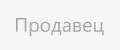

In [37]:
b_img

InvalidSchema: No connection adapters were found for 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAgEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/2wBDAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQH/wAARCAAyAHgDAREAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+7CgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoA+QPhDp3xp+JPw28J+Ob34/6/pl14i0+S9msbX4f/AAymt7Zkvbq12RSTeGRI6lbcPlxnLEdAKAOs+GXxUl0n4Yal4n+K/ixr86R8RvE3gqXxJcaTZWPnLaeL5vDWitdWXh/T7aytlkcW6z3C2qQwB2nupliR5VAPQ9B+MXgXxF4gtPDFneaxZarqkF1daAuveGPEnhy08T2tkhlvLjwxf65pWn2euxW8I+0sdOmmaS0zeQLLapLMgBW1/wCNvw/8O6rqmj3N5rmpXegGIeJZfDfhHxV4n0/wwJUWVT4h1TQNH1DT9LZIW8+aC4uRdQRDfNAgZNwB1d3488J2fguf4htrNvceDrfRm8QPrdist9A+kpF57XUMVrHLcTlYwcwRQtciRWh8nzlMYAMjwZ8VfBnj2TxBD4fu9UE/haPT5ddtta8O+IPDd1YRarBd3NhI9rr+m6bcSR3FvZXEyvFG6iNVYkCSPcAZWg/G74f+Ite0vw7ZXmu2d9r63T+G5td8I+KfDmmeJRZQ/aLoaBqmu6Rp9jqjx2+bhY7adnmgBlgWRBmgChqX7QXww0jUte02+1PX0PhfUbrSfEOo2/gfxtf6Ho99YxRzXkV/run+H7rSbdbWGaGa4ne7EEEEsdxNIkDebQB1viX4l+DvClnoV5qOpT3jeKcnwxp/h/TNU8Tax4jUW0d48ui6RoFnqOo39vFazQ3E93Dbm1t4p4Gnnj8+HeAUYPi54CuPCF/44TWJo9B0nU4NE1k3GlatbaroutT6jY6T/ZGr6FPZR6zp2oxX2pWUc1tc2MbxxXEd3zZuk7AHUaz4r0LQNT8NaPqt41tqHi7UrjSNAhFtdTi91C10651WaBpYIZYrULZWdxKJbp4YWKCMSGR0VgDoqACgAoAKAPAv2XIZrf4A/DKGeKSGVNDnDxSo0ciE6rqLAMjhWUlSCMgZBB6GgD5v8QR/Zv2cfFX27TLm+iP7Rl/NJpYtfOn1K2b40xMbWC1mCrcm+jzDDG37ucyBN21iaAPYPFvjTw58XvGHwe0L4eXUuuX/AIZ+Ien+PPEupRabqVtB4V8PaJo2sQXllrFxeWls2n6prNzqVppkGjS4vWdne8toYo1koAq/Dj4g+FvhHB468JfEm8uPDnikfEbxt4hSS803UZ5fHNh4j1ifU9G1zw/JZWl1/bk13p8ltpn2K1efUra5082M1tG0aIADynUNZ0zwf8EPBHwi8YO/hS9+JXii+1jUtFu7K/8AO8G/C7U/HmqeK9QS+itLWTyLh9Jjj8PpprIsy6nq5tGgEVrPLGAdh4d+Kmmz/EL9pnXfh/NH4m1/UfBPhLXvA2l/YdUX/hIrnwf4U1O11BLa2e1t7m6Wx1S+063uLSMw3Ny1zHFbMPMEyAHJf8JHD4u8V/s96nB8TfFvxL1Y/EHR7vX4zoWk6R4R8LXE3hjW/PsTBpPhjSZbHWHuHmhSy1HVdRvYrK3uTfJGXtpZgDC1PVba2uv2jPDt78W/EXgyTXPiR44+z+A9K8F2mvL4rhvvD2h2UcqX0fh288QL/bcsMmiSQaTrmnlYrQyQG2mmmuZADs/FNtregeKfg3418Uatr3wY8On4JW3hK71Lw9pOna1pvgbxTHPp2p3fh7Vm8R6V4ni0SwvrGOKwtNQmRb2SfR0sbjUZYxcmgCTxXo/h63+Cvxj8Z6F468R/EMeKPFPw8m1nXtW0az06C4u/DXiPwhayXWjwaRoGh2moWq6aba3utR0+1uba4uNOliFxJd214AAbvxI+NPwx1zx58DL/AErxVBdWegePdRu9ZuRp2swxafbah4T1rSbOad7jTogEn1G8tbRSu7Ekyb9qZYAH2nQAUAFABQAUAed/E/wNL8Q/DVv4fh1KPSmh8S+FNfN1JbNdqyeG/EOn63JbCJZrch7tLI26SeZiJpBIyOFKEA9EoAKAOW/4RSz/AOE1/wCE4+03P9of8IsPCgtP3X2P7H/ax1c3OPL883JnxEP3oiEQP7sudwAFv/CtnqHi7w14xluLlL7wzo/ijRrS1j8r7JcQeKp/Dk95LcbozN51u3hq1Ft5UkabZ7jzVkPllADqKACgAoAKAOT8ceELHx54Y1HwrqVzd2dlqUmmyTXFiYRdIdM1Wx1aIRmeKaICSaxjik3Rt+6d9uH2sADrKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgAoAKACgD/2Q=='

In [57]:
product_url = 'https://www.wildberries.ru/catalog/17292736/detail.aspx?targetUrl=GP'
page_html = requests.get(product_url).text
bs = BeautifulSoup(page_html, 'html.parser')


In [58]:
img_url

<div class="slide__content img-plug current">
<picture>
<source media="(max-width: 1024px)" srcset="//images.wbstatic.net/big/new/11680000/11689976-1.jpg"/>
<img alt="Мёд Куркума и Имбирь: Сладкое без сахара сладости полезные пп крем мед суфле, вкусные подарки, 400 г BEES &amp; SEEDS. Вид 1." src="//images.wbstatic.net/c246x328/new/11680000/11689976-1.jpg">
</img></picture>
</div>

In [70]:
product_url = 'https://www.wildberries.ru/catalog/17292736/detail.aspx?targetUrl=GP'
page_html = requests.get(product_url).text
bs = BeautifulSoup(page_html, 'html.parser')

img_url = bs.find('div', {'class': ['slide_content']})

In [73]:
bs.find('div', {'class': "current"}).find('img').attrs['src']
# bs.find('div', {'class': ['slide__content']})

'//images.wbstatic.net/c246x328/new/17290000/17292736-1.jpg'